In [1]:
import qiskit.tools.jupyter
import matplotlib as ml
from GenerateRandomCircuit import *

In [2]:
backends_dict={}

backendname_sim = 'qasm_simulator'
backends_dict[backendname_sim] = Aer.get_backend(backendname_sim)

#load IBMQ account
#IBMQ.save_account('yourAPItoken')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

for backendname in ['ibmq_16_melbourne', 'ibmqx2']:
    backends_dict[backendname] = provider.get_backend(backendname)

To describe the arquitecture of the quantum device, the function createGraph creates a graph. Weights are 1 at the moment. A future extension can weigh the edges wrt CNOT error rates.

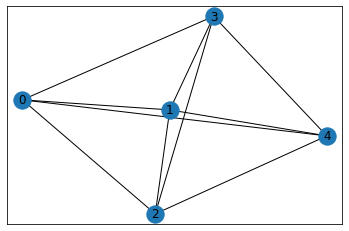

In [3]:
G_qasm_simulator=createGraph(backends_dict['qasm_simulator'],5)
nx.draw_networkx(G_qasm_simulator)

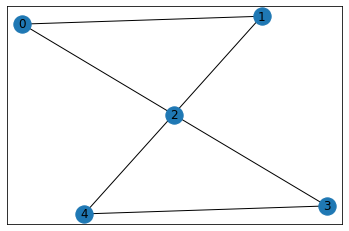

In [4]:
G_ibmqx2=createGraph(backends_dict['ibmqx2'])
nx.draw_networkx(G_ibmqx2)

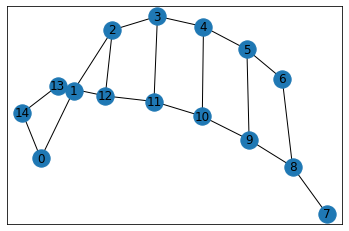

In [5]:
G_melbourne=createGraph(backends_dict['ibmq_16_melbourne'])
nx.draw_networkx(G_melbourne)

To generate a random circuit, we use the randomCircuit() function. 
It takes the graph describing the quantum engine as its first argument.

This will only return an empty circuit.
Depth is:  0


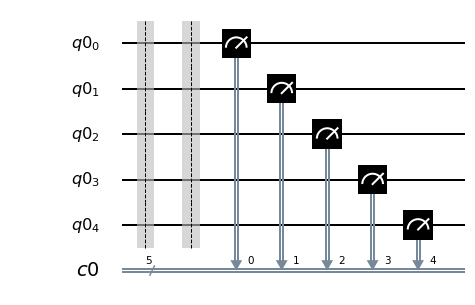

In [6]:
circ = randomCircuit(G_ibmqx2)
circ.draw(output='mpl')

However, we did not specify that we want to have any gates in the circuit. To do that, we can set the number of CNOTs.

Constructing circuit with  9  CNOTs and arbitrary depth...
Depth is:  7


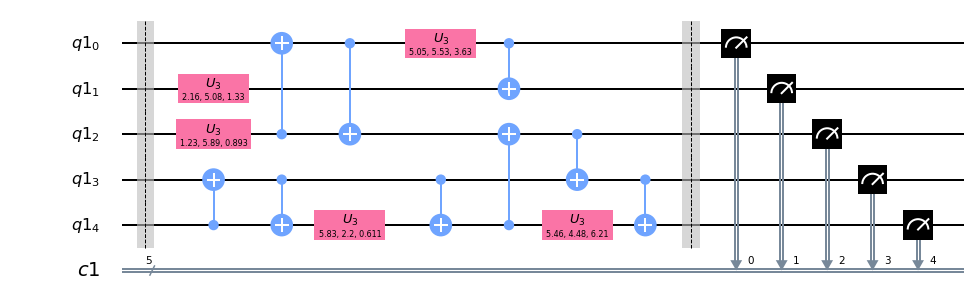

In [7]:
circ = randomCircuit(G_ibmqx2, cnots=9)
circ.draw(output='mpl')

We can also specify the depth instead of the number of CNOTs:

Constructing circuit with arbitrarly many CNOTs and  10  depth...
Depth is:  10


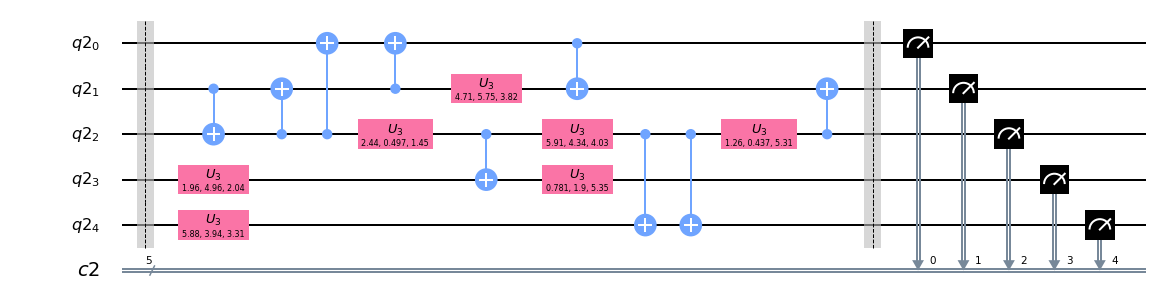

In [8]:
circ = randomCircuit(G_ibmqx2, depth=10)
circ.draw(output='mpl')

If we specify both parameters, the algorithm will first try to determine if the chosen configuration is possible:

Impossible circuit parameters: depth is too low to fit all the required CNOTs into the given graph. Try again with different parameters.
Depth is:  0


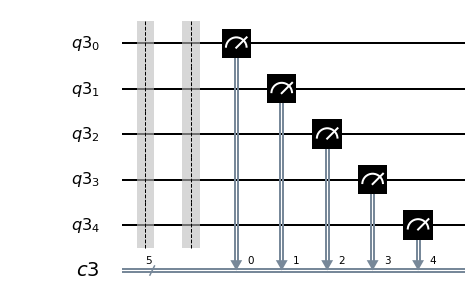

In [9]:
circ = randomCircuit(G_ibmqx2, cnots=13, depth=2)
circ.draw(output='mpl')

Impossible circuit parameters: number of CNOTs is too low to reach the desired depth. Try again with different parameters.
Depth is:  0


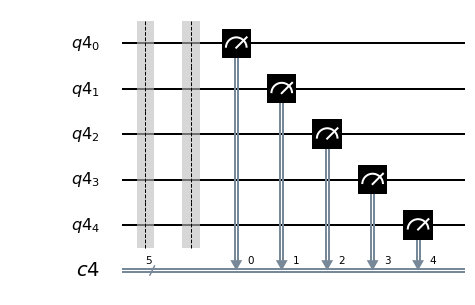

In [10]:
circ = randomCircuit(G_ibmqx2, cnots=3, depth=9)
circ.draw(output='mpl')

If it is indeed possible, it will construct a random circuit with the given depth and number of CNOTs:

Constructing circuit with  14  CNOTs and  9  depth...
Preconstruction...
Successful at attempt  33
Constructing circuit...
Depth is:  9


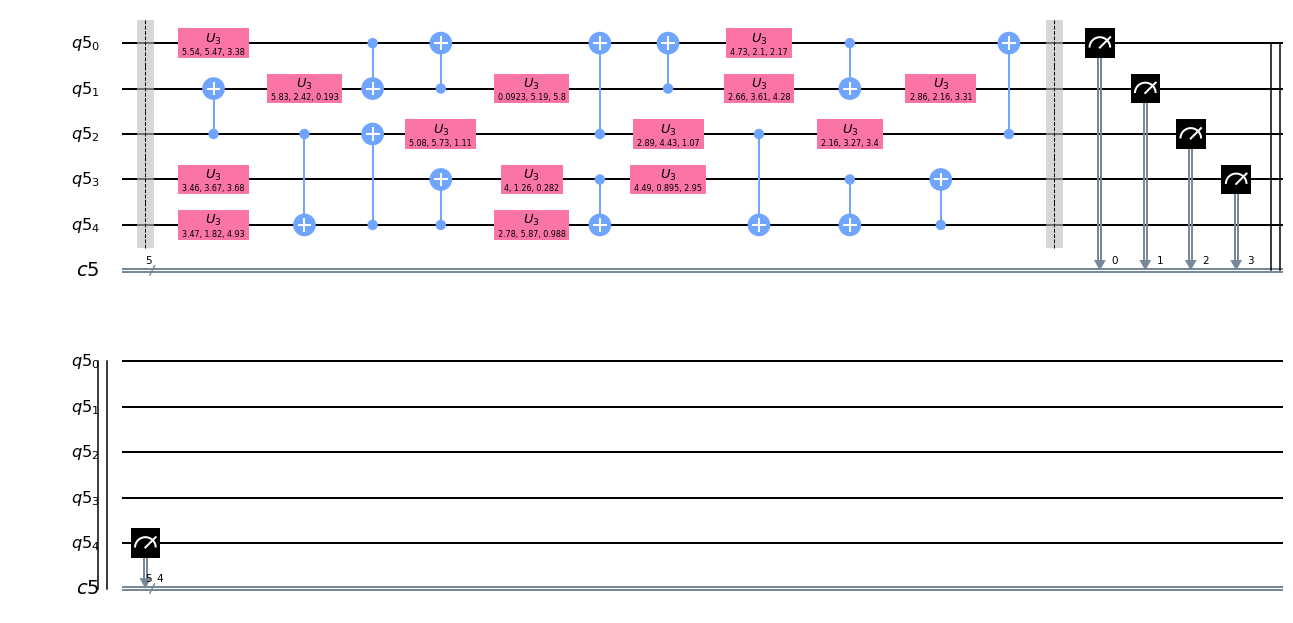

In [11]:
circ = randomCircuit(G_ibmqx2, cnots=14, depth=9)
circ.draw(output='mpl')

Since it is sometimes difficult to see that the depth is indeed what it should be, we can construct the circuit with barriers:

Constructing circuit with  14  CNOTs and  9  depth...
Preconstruction...
Successful at attempt  42
Constructing circuit...
Depth is:  9


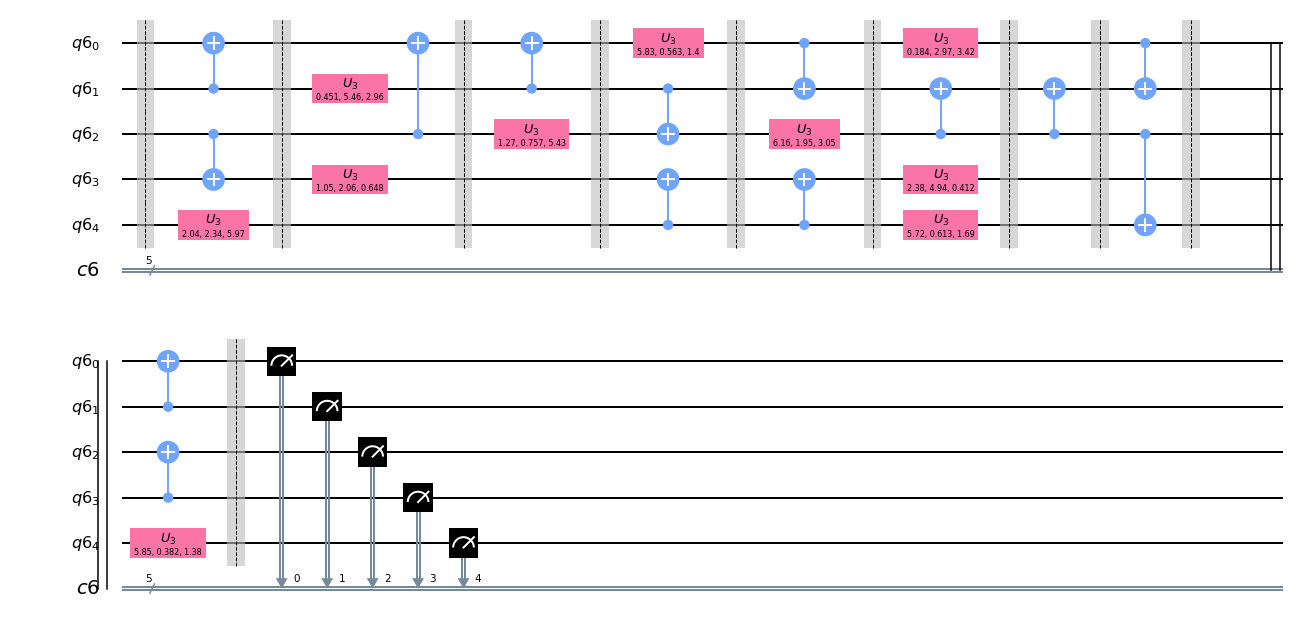

In [12]:
circ = randomCircuit(G_ibmqx2, cnots=14, depth=9, barrier=True)
circ.draw(output='mpl')

Depending on the parameters, construction can take a while. This is because the algorithm has to generate lots of random circuits until one of them fits the specifications.
Sometimes it will simply give up after a large number of tries.

Constructing circuit with  16  CNOTs and  33  depth...
Preconstruction...
Sorry, unable to construct the circuit after  1742401  attempts. Try again with different parameters.
Depth is:  0


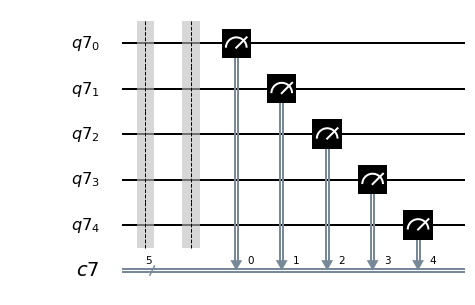

In [13]:
circ = randomCircuit(G_ibmqx2, cnots=16, depth=33)
circ.draw(output='mpl')

Constructing circuit with arbitrarly many CNOTs and  10  depth...
Depth is:  10


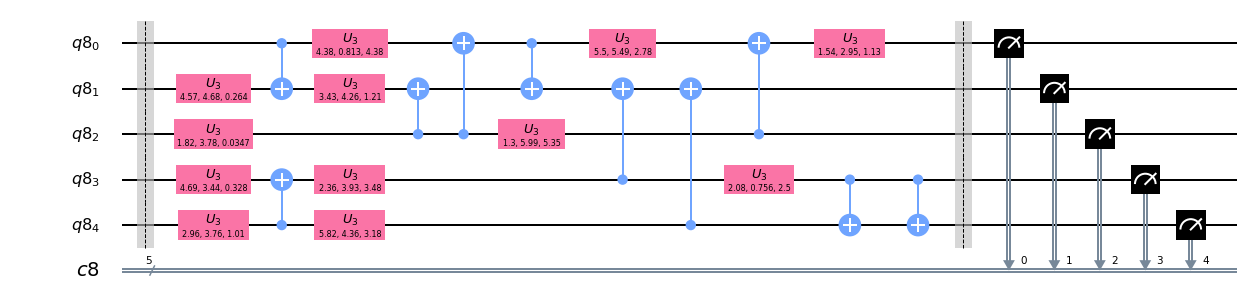

In [14]:
circ = randomCircuit(G_qasm_simulator, depth=10)
circ.draw(output='mpl')

Constructing circuit with arbitrarly many CNOTs and  10  depth...
Depth is:  10


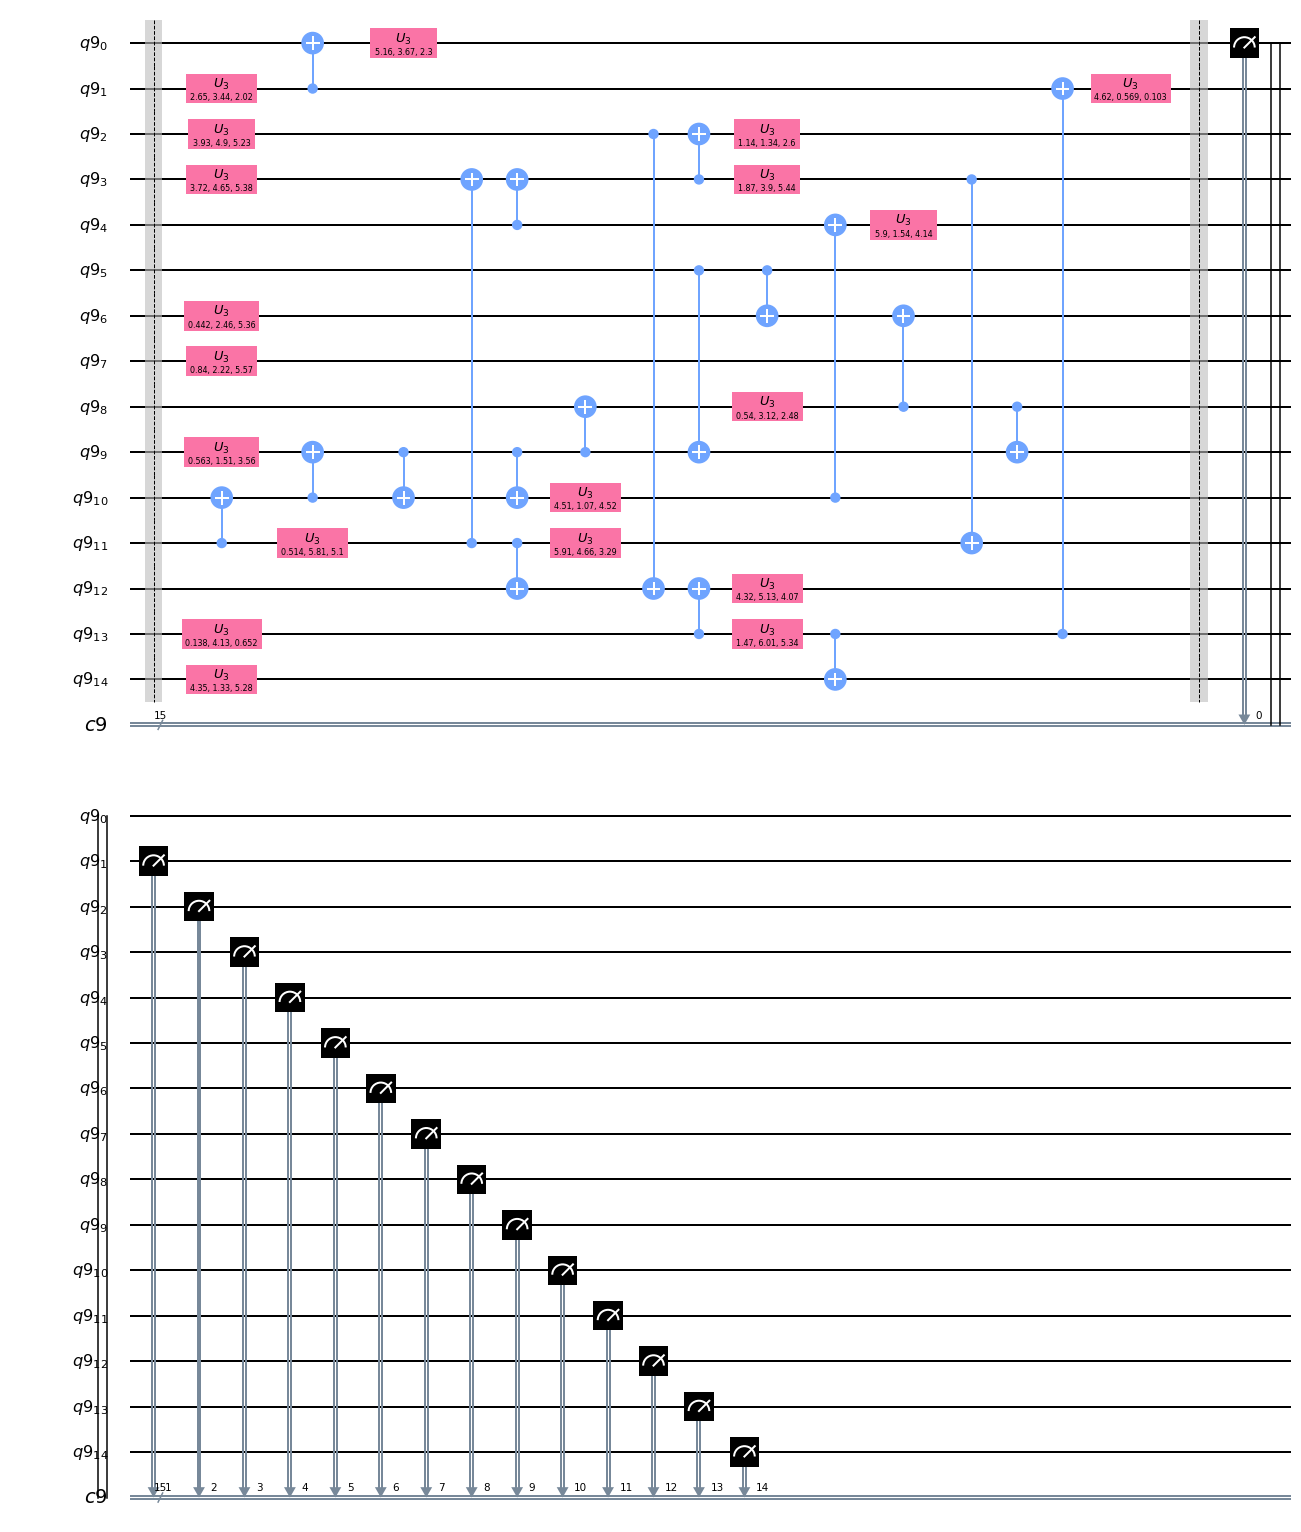

In [15]:
circ = randomCircuit(G_melbourne, depth=10)
circ.draw(output='mpl')